In [3]:
import pandas as pd
import numpy as np

In [4]:
from IPython import get_ipython
from IPython.display import display

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/drug200.csv')
df.head()


Mounted at /content/drive


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [8]:
df['Drug'].value_counts()

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


In [9]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [11]:
df['Drug_encoded'] = le.fit_transform(df['Drug'])
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_encoded
0,23,F,HIGH,HIGH,25.355,DrugY,0
1,47,M,LOW,HIGH,13.093,drugC,3
2,47,M,LOW,HIGH,10.114,drugC,3
3,28,F,NORMAL,HIGH,7.798,drugX,4
4,61,F,LOW,HIGH,18.043,DrugY,0
...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,3
196,16,M,LOW,HIGH,12.006,drugC,3
197,52,M,NORMAL,HIGH,9.894,drugX,4
198,23,M,NORMAL,NORMAL,14.020,drugX,4


In [12]:
df['Cholestrol_encoded'] = le.fit_transform(df['Cholesterol'])

In [13]:
df['BP_encoded'] = le.fit_transform(df['BP'])

In [14]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_encoded,Cholestrol_encoded,BP_encoded
0,23,F,HIGH,HIGH,25.355,DrugY,0,0,0
1,47,M,LOW,HIGH,13.093,drugC,3,0,1
2,47,M,LOW,HIGH,10.114,drugC,3,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,4,0,2
4,61,F,LOW,HIGH,18.043,DrugY,0,0,1
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,3,0,1
196,16,M,LOW,HIGH,12.006,drugC,3,0,1
197,52,M,NORMAL,HIGH,9.894,drugX,4,0,2
198,23,M,NORMAL,NORMAL,14.020,drugX,4,1,2


In [15]:
pd.get_dummies(df['Sex'])

,F,M
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
195,True,False
196,False,True
197,False,True
198,False,True


In [16]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Drug_encoded,Cholestrol_encoded,BP_encoded
0,23,F,HIGH,HIGH,25.355,DrugY,0,0,0
1,47,M,LOW,HIGH,13.093,drugC,3,0,1
2,47,M,LOW,HIGH,10.114,drugC,3,0,1
3,28,F,NORMAL,HIGH,7.798,drugX,4,0,2
4,61,F,LOW,HIGH,18.043,DrugY,0,0,1
...,...,...,...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC,3,0,1
196,16,M,LOW,HIGH,12.006,drugC,3,0,1
197,52,M,NORMAL,HIGH,9.894,drugX,4,0,2
198,23,M,NORMAL,NORMAL,14.020,drugX,4,1,2


In [17]:
df.drop(columns =['Drug','Cholesterol','BP'],axis=1,inplace=True)

In [18]:
df

,Age,Sex,Na_to_K,Drug_encoded,Cholestrol_encoded,BP_encoded
0,23,F,25.355,0,0,0
1,47,M,13.093,3,0,1
2,47,M,10.114,3,0,1
3,28,F,7.798,4,0,2
4,61,F,18.043,0,0,1
...,...,...,...,...,...,...
195,56,F,11.567,3,0,1
196,16,M,12.006,3,0,1
197,52,M,9.894,4,0,2
198,23,M,14.020,4,1,2


In [19]:
df = pd.concat([df,pd.get_dummies(df['Sex'])],axis=1)

In [20]:
df

,Age,Sex,Na_to_K,Drug_encoded,Cholestrol_encoded,BP_encoded,F,M
0,23,F,25.355,0,0,0,True,False
1,47,M,13.093,3,0,1,False,True
2,47,M,10.114,3,0,1,False,True
3,28,F,7.798,4,0,2,True,False
4,61,F,18.043,0,0,1,True,False
...,...,...,...,...,...,...,...,...
195,56,F,11.567,3,0,1,True,False
196,16,M,12.006,3,0,1,False,True
197,52,M,9.894,4,0,2,False,True
198,23,M,14.020,4,1,2,False,True


In [21]:
df.drop(columns=['F','M'],axis=1,inplace=True)

In [22]:
df['Sex'] = le.fit_transform(df['Sex'])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Sex                 200 non-null    int64  
 2   Na_to_K             200 non-null    float64
 3   Drug_encoded        200 non-null    int64  
 4   Cholestrol_encoded  200 non-null    int64  
 5   BP_encoded          200 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 9.5 KB


In [24]:
X = df.drop(columns=['Drug_encoded'],axis=1)
y = df['Drug_encoded']

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape

(160, 5)

In [27]:
X_test.shape

(40, 5)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train

array([[-0.83405574, -1.03823026, -0.74045911,  1.1055416 ,  0.0820827 ],
       [ 0.41196591,  0.96317747, -0.87126694, -0.90453403,  1.27601281],
       [-0.39794817, -1.03823026, -0.89684776,  1.1055416 ,  1.27601281],
       [-0.77175466, -1.03823026,  2.39090899, -0.90453403,  0.0820827 ],
       [-0.70945358,  0.96317747,  0.86573941, -0.90453403,  1.27601281],
       [ 0.66117024, -1.03823026, -0.63993343, -0.90453403,  0.0820827 ],
       [-0.02414167,  0.96317747,  0.24281204, -0.90453403,  0.0820827 ],
       [-0.83405574, -1.03823026,  1.35218969,  1.1055416 , -1.11184742],
       [ 1.78258973,  0.96317747, -0.10494874,  1.1055416 , -1.11184742],
       [ 0.34966483, -1.03823026, -0.35923585, -0.90453403,  1.27601281],
       [-1.58166873, -1.03823026, -0.95602932,  1.1055416 ,  1.27601281],
       [-0.273346  , -1.03823026,  0.35177248,  1.1055416 ,  0.0820827 ],
       [-1.45706657, -1.03823026, -1.04922644, -0.90453403,  1.27601281],
       [ 1.28418107,  0.96317747,  0.0

In [30]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [31]:
model = Sequential()

model.add(Dense(60,activation='tanh',input_dim=5))
model.add(Dense(48,activation='tanh'))
model.add(Dense(32,activation='tanh'))
model.add(Dense(24,activation='tanh'))
model.add(Dense(16,activation='tanh'))
model.add(Dense(5,activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [33]:
history = model.fit(X_train,y_train,epochs=30,verbose=1,validation_split=0.2)

Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 206ms/step - accuracy: 0.1573 - loss: 1.6749 - val_accuracy: 0.4688 - val_loss: 1.4916
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4979 - loss: 1.4306 - val_accuracy: 0.6562 - val_loss: 1.3693
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6656 - loss: 1.2674 - val_accuracy: 0.7188 - val_loss: 1.2488
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7073 - loss: 1.1247 - val_accuracy: 0.7188 - val_loss: 1.1418
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7479 - loss: 0.9958 - val_accuracy: 0.6875 - val_loss: 1.0442
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7458 - loss: 0.9091 - val_accuracy: 0.7188 - val_loss: 0.9522
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8531 - loss: 0.7943 - val_accuracy: 0.7812 - val_loss: 0.8666
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7937 - loss: 0.7737 - val_accuracy: 0.8125 - val_loss: 0.7879
Epo

In [34]:
ylog = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 485ms/step


In [35]:
y_pred = np.argmax(ylog, axis=1)

In [36]:
y_pred[7]

4

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

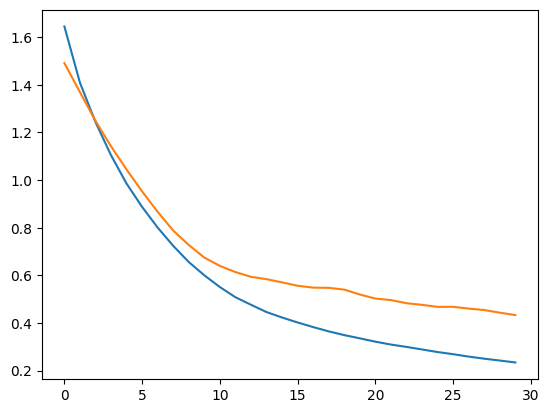

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


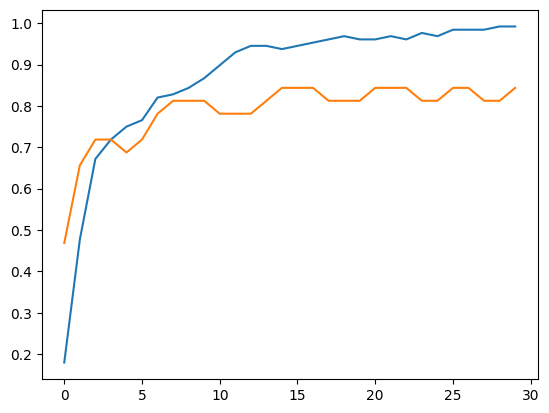

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()